In [24]:
import pandas as pd


df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')

# Keep rows with price, year, odometer only
df = df.dropna(subset=['price', 'year', 'odometer'])

# Convert to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df = df.dropna(subset=['year', 'odometer'])

# Handle county if it exists
if 'county' in df.columns:
    df['county'] = df['county'].fillna('Unknown')
    top_counties = df['county'].value_counts().nlargest(20).index
    df['county'] = df['county'].apply(lambda x: x if x in top_counties else 'Other')

# final columns
final_features = [
    'price', 'year', 'odometer', 'county', 'state', 'manufacturer',
    'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
df = df[[col for col in final_features if col in df.columns]]

# encode
categorical_cols = list(set(df.columns) - set(['price', 'year', 'odometer']))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Only convert boolean values
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


print(df.shape)
df.head()




(57927, 98)


,price,year,odometer,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,33590,2014.0,57923.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28,22590,2010.0,71229.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
29,39590,2020.0,19160.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30,30990,2017.0,41124.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31,15000,2013.0,128000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Baseline Linear Regression Results:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


Baseline Linear Regression Results:
MAE:  299421.16
RMSE: 409409.31
R²:   -668.7422


In [17]:
import pandas as pd


df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')

# Keep rows with price, year, odometer only
df = df.dropna(subset=['price', 'year', 'odometer'])

# Convert to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df = df.dropna(subset=['year', 'odometer'])

# Handle county if it exists
if 'county' in df.columns:
    df['county'] = df['county'].fillna('Unknown')
    top_counties = df['county'].value_counts().nlargest(20).index
    df['county'] = df['county'].apply(lambda x: x if x in top_counties else 'Other')

# final columns
final_features = [
    'price', 'year', 'odometer', 'county', 'state', 'manufacturer',
    'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
df = df[[col for col in final_features if col in df.columns]]

# encode
categorical_cols = list(set(df.columns) - set(['price', 'year', 'odometer']))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Only convert boolean values
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

#filter out outliers
df = df[(df['price'] >= 500) & (df['price'] <= 100000)]


mean_price = df['price'].mean()
median_price = df['price'].median()

#Mean and Median for Price
print(f"Mean Price: ${mean_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")

print('\n')
print('\n')

#Standard Deviation for Odometer and Price
std_price = df['price'].std()
std_odometer = df['odometer'].std()

print(f"Standard dev Price: ${std_price:,.2f}")
print(f"Standard dev Odometer: {std_odometer:,.2f} miles")

print('\n')
print('\n')

#Min and Max Values for price, year, and odometer 
print("Year Range:", df['year'].min(), "to", df['year'].max())
print("Price Range: $", df['price'].min(), "to $", df['price'].max())
print("Odometer Range:", df['odometer'].min(), "to", df['odometer'].max(), "miles")

print('\n')
print('\n')

#Most Frequent Makes and Models
top_manufacturers = df.filter(like='manufacturer_').sum().sort_values(ascending=False).head(10)
print("Top Manufacturers:\n", top_manufacturers)

print('\n')
print('\n')

#Missing values for each 
df.isnull().sum().sort_values(ascending=False).head(10)


Mean Price: $19,785.57
Median Price: $16,500.00




Standard dev Price: $14,472.99
Standard dev Odometer: 182,023.69 miles




Year Range: 1900.0 to 2022.0
Price Range: $ 500 to $ 100000
Odometer Range: 0.0 to 10000000.0 miles




Top Manufacturers:
 manufacturer_ford             7899
manufacturer_chevrolet        6297
manufacturer_toyota           4944
manufacturer_honda            2730
manufacturer_nissan           2574
manufacturer_ram              2048
manufacturer_bmw              2009
manufacturer_jeep             1874
manufacturer_mercedes-benz    1717
manufacturer_gmc              1709
dtype: int64






price                    0
title_status_rebuilt     0
title_status_missing     0
title_status_lien        0
cylinders_other          0
cylinders_8 cylinders    0
cylinders_6 cylinders    0
cylinders_5 cylinders    0
cylinders_4 cylinders    0
cylinders_3 cylinders    0
dtype: int64

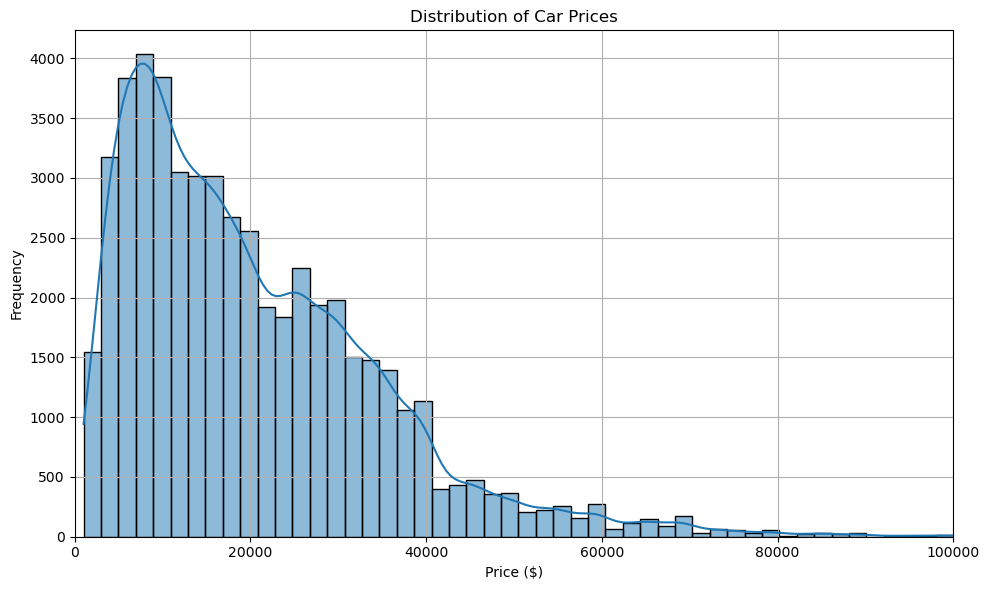

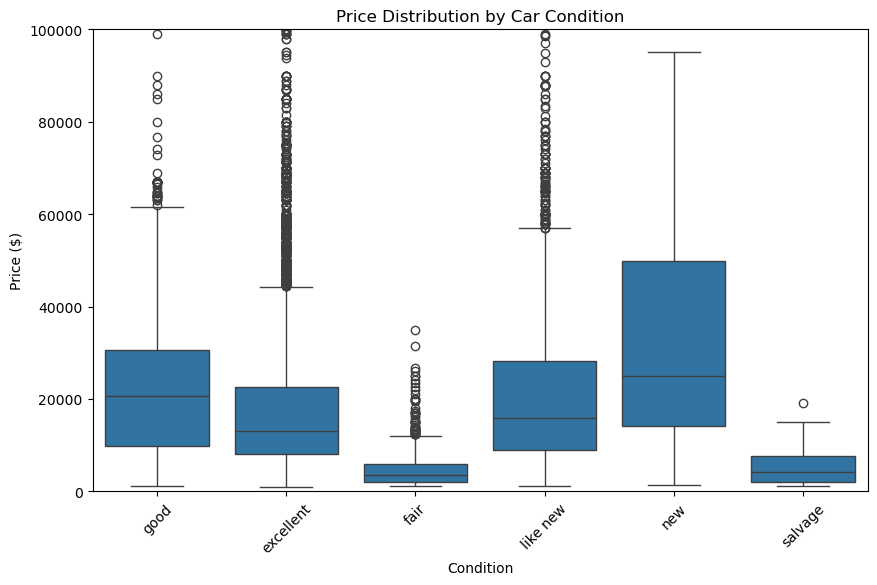

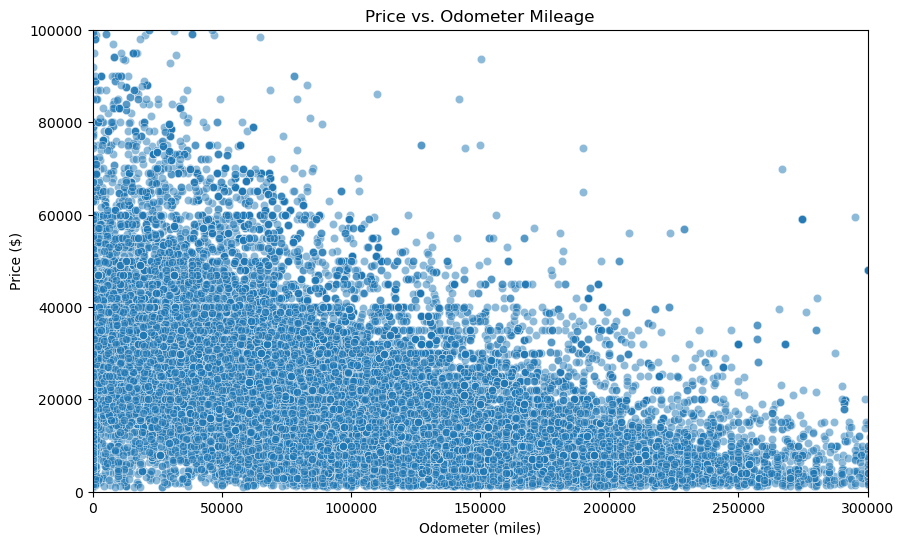

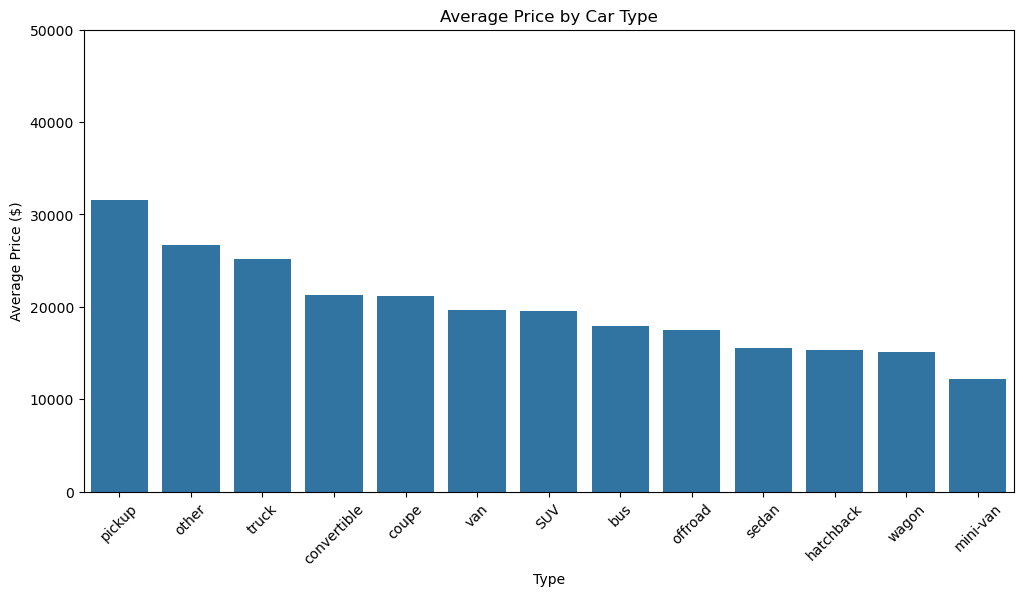

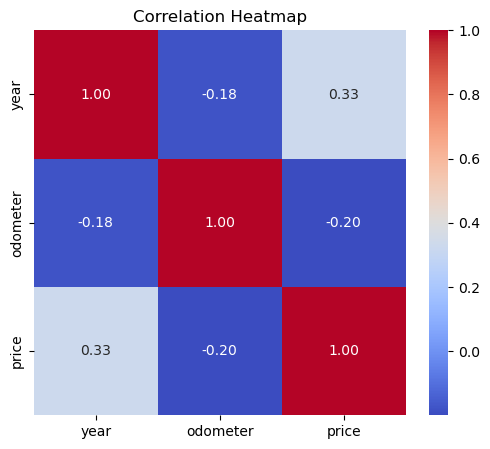

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd


df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')

df = df[(df['price'] > 1000) & (df['price'] < 100000)]

# histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.xlim(0, 100000)
plt.grid(True)
plt.tight_layout()
plt.show()

#Boxplot of Price By Condition
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='condition', y='price')  
plt.title("Price Distribution by Car Condition")
plt.xlabel("Condition")
plt.ylabel("Price ($)")
plt.ylim(0, 100000) 
plt.xticks(rotation=45)
plt.show()


#Scatterplot of Odometer vs Price
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
plt.title("Price vs. Odometer Mileage")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price ($)")
plt.ylim(0, 100000)
plt.xlim(0, 300000)
plt.show()

#Bar chart of Average Price by Type
avg_price_by_type = df.groupby('type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values)
plt.title("Average Price by Car Type")
plt.xlabel("Type")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.ylim(0, 50000)
plt.show()


#Heatmap of Correlation
numeric_features = df[['year', 'odometer', 'price']]
correlation = numeric_features.corr()

plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:

df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')
df = df.dropna(subset=['price', 'year', 'odometer'])
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df = df.dropna(subset=['year', 'odometer'])


df = df[(df['price'] > 1000) & (df['price'] < 100000)]
df = df[df['odometer'] < 300000]
df = df[df['year'] >= 1990]


if 'county' in df.columns:
    df['county'] = df['county'].fillna('Unknown')
    top_counties = df['county'].value_counts().nlargest(20).index
    df['county'] = df['county'].apply(lambda x: x if x in top_counties else 'Other')

final_features = [
    'price', 'year', 'odometer', 'county', 'state', 'manufacturer',
    'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
df = df[[col for col in final_features if col in df.columns]]

# Encode
categorical_cols = list(set(df.columns) - set(['price', 'year', 'odometer']))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression Results:")
print(f"MAE:  {rf_mae:,.2f}")
print(f"RMSE: {rf_rmse:,.2f}")
print(f"R²:   {rf_r2:.4f}")



Random Forest Regression Results:
MAE:  4,470.15
RMSE: 6,717.85
R²:   0.7798


In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')
df = df.dropna(subset=['price', 'year', 'odometer'])
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df = df.dropna(subset=['year', 'odometer'])

# Filter out extreme values 
df = df[(df['price'] > 1000) & (df['price'] < 100000)]
df = df[df['odometer'] < 300000]
df = df[df['year'] >= 1990]


if 'county' in df.columns:
    df['county'] = df['county'].fillna('Unknown')
    top_counties = df['county'].value_counts().nlargest(20).index
    df['county'] = df['county'].apply(lambda x: x if x in top_counties else 'Other')


final_features = [
    'price', 'year', 'odometer', 'county', 'state', 'manufacturer',
    'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
df = df[[col for col in final_features if col in df.columns]]

#  encode 
categorical_cols = list(set(df.columns) - set(['price', 'year', 'odometer']))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Define X and y
X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

lasso_pred = lasso_model.predict(X_test)

lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso Regression Results:")
print(f"MAE:  {lasso_mae:,.2f}")
print(f"RMSE: {lasso_rmse:,.2f}")
print(f"R²:   {lasso_r2:.4f}")


Lasso Regression Results:
MAE:  5,657.26
RMSE: 8,025.42
R²:   0.6857


In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')
df = df.dropna(subset=['price', 'year', 'odometer'])
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df = df.dropna(subset=['year', 'odometer'])

# Filter out extreme values BEFORE modeling
df = df[(df['price'] > 1000) & (df['price'] < 100000)]
df = df[df['odometer'] < 300000]
df = df[df['year'] >= 1990]

if 'county' in df.columns:
    df['county'] = df['county'].fillna('Unknown')
    top_counties = df['county'].value_counts().nlargest(20).index
    df['county'] = df['county'].apply(lambda x: x if x in top_counties else 'Other')


final_features = [
    'price', 'year', 'odometer', 'county', 'state', 'manufacturer',
    'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
df = df[[col for col in final_features if col in df.columns]]

#  encode
categorical_cols = list(set(df.columns) - set(['price', 'year', 'odometer']))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Define X and y
X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions + evaluation
xgb_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

# Print results
print("XGBoost Regression Results:")
print(f"MAE:  {xgb_mae:,.2f}")
print(f"RMSE: {xgb_rmse:,.2f}")
print(f"R²:   {xgb_r2:.4f}")



XGBoost Regression Results:
MAE:  4,068.92
RMSE: 6,295.51
R²:   0.8066


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("vehicles.csv", engine='python', on_bad_lines='skip')
df = df.dropna(subset=['price', 'year', 'odometer'])

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df = df.dropna(subset=['year', 'odometer'])

#filtrs
df = df[(df['price'] > 1000) & (df['price'] < 100000)]
df = df[df['odometer'] < 300000]
df = df[df['year'] >= 1990]


final_features = [
    'price', 'year', 'odometer', 'county', 'state', 'manufacturer',
    'condition', 'cylinders', 'fuel', 'title_status',
    'transmission', 'drive', 'size', 'type', 'paint_color'
]
df = df[[col for col in final_features if col in df.columns]]
categorical_cols = list(set(df.columns) - set(['price', 'year', 'odometer']))
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Metrics
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print(f"MAE:  {lr_mae:,.2f}")
print(f"RMSE: {lr_rmse:,.2f}")
print(f"R²:   {lr_r2:.4f}")



Linear Regression Results:
MAE:  5,659.64
RMSE: 8,025.64
R²:   0.6857
